Detecting 1 CUDA device(s).


(0.0, 1.0, 0.0, 1.0)

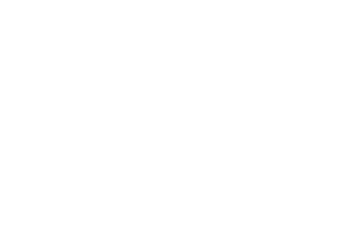

In [3]:
import cdt
from cdt import SETTINGS
import pandas as pd
from cdt.independence.graph import FSGNN
from pandas import Series,DataFrame
from sklearn.datasets import load_boston
SETTINGS.verbose=True
#SETTINGS.NJOBS=16
#SETTINGS.GPU=1
import networkx as nx
import matplotlib.pyplot as plt
plt.axis('off')

In [4]:
# Load data
data = pd.read_csv('merge_clear.csv')
feature_list = []
for row in data:
    feature_list.append(row)
data.head()
feature_list = feature_list[:-1]
print(feature_list)

['New-Identifiers-words-AVG', 'New-Identifiers-words-MIN', 'New-Abstractness-words-AVG', 'New-Abstractness-words-MAX', 'New-Abstractness-words-MIN', 'New-Commented-words-AVG', 'New-Commented-words-MAX', 'New-Synonym-commented-words-AVG', 'New-Synonym-commented-words-MAX', 'New-Comments-readability', 'New-Number-of-senses-AVG', 'New-Number-of-senses-MAX', 'New-Semantic-Text-Coherence-Standard-@-0.1', 'New-Semantic-Text-Coherence-Normalized-@-0.3', 'New-Text-Coherence-AVG', 'New-Text-Coherence-MIN', 'New-Text-Coherence-MAX', 'BW-Avg-Assignment', 'BW-Avg-blank-lines', 'BW-Avg-commas', 'BW-Avg-comments', 'BW-Avg-comparisons', 'BW-Avg-Identifiers-Length', 'BW-Avg-conditionals', 'BW-Avg-indentation-length', 'BW-Avg-keywords', 'BW-Avg-line-length', 'BW-Avg-loops', 'BW-Avg-number-of-identifiers', 'BW-Avg-numbers', 'BW-Avg-operators', 'BW-Avg-parenthesis', 'BW-Avg-periods', 'BW-Avg-spaces', 'BW-Max-Identifiers-Length', 'BW-Max-indentation', 'BW-Max-keywords', 'BW-Max-line-length', 'BW-Max-numbe

In [5]:
df_target = Series(data['Readable'])
df_features = data
df_features.drop(['Readable'],axis = 1, inplace = True)
df_features.head()

,New-Identifiers-words-AVG,New-Identifiers-words-MIN,New-Abstractness-words-AVG,New-Abstractness-words-MAX,New-Abstractness-words-MIN,New-Commented-words-AVG,New-Commented-words-MAX,New-Synonym-commented-words-AVG,New-Synonym-commented-words-MAX,New-Comments-readability,...,BW-Avg-periods,BW-Avg-spaces,BW-Max-Identifiers-Length,BW-Max-indentation,BW-Max-keywords,BW-Max-line-length,BW-Max-number-of-identifiers,BW-Max-numbers,BW-Max-char,BW-Max-words
0,0.882353,0,3.733333,10,0,0.000000,0,1.434783,4,0.0,...,0.250000,1.500000,13,0,2,47,6,0,17,2
1,0.848485,0,5.357143,9,0,0.151515,1,2.078947,5,0.0,...,1.142857,15.285714,11,16,1,66,6,1,107,4
2,0.805556,0,5.242424,9,0,0.083333,1,1.974359,7,0.0,...,0.333333,4.500000,19,0,1,98,11,1,27,5
3,0.875000,0,7.142857,10,3,0.041667,1,1.576923,4,100.0,...,0.000000,11.000000,15,12,1,54,5,0,139,5
4,0.882353,0,4.066667,15,0,0.176471,1,0.750000,3,100.0,...,0.428571,8.142857,20,12,2,46,3,1,73,2


In [6]:
# 原始数据
rank_sort = {}
for epoch in range(100):
    obj = cdt.independence.graph.DecisionTreeRegression()
    output = obj.predict_features(df_features, df_target)
    i = 0
    dict = {}
    for result in output:
        dict[feature_list[i]] = result
        i += 1
#     rank为特征数
    rank = len(feature_list)
    for item in sorted(dict.items(), key=lambda x: x[1]):
        if epoch == 0:
            rank_sort[item[0]] = 0
        rank_sort[item[0]] += rank
        rank -= 1    
for i in rank_sort.items():
    print(i)

('New-Abstractness-words-MIN', 4009)
('New-Identifiers-words-MIN', 4046)
('BW-Max-numbers', 3720)
('New-Number-of-senses-AVG', 3522)
('New-Commented-words-MAX', 3757)
('BW-Avg-loops', 3961)
('BW-Avg-conditionals', 3594)
('New-Abstractness-words-MAX', 3729)
('BW-Avg-indentation-length', 3032)
('BW-Avg-blank-lines', 3120)
('New-Commented-words-AVG', 3442)
('BW-Max-indentation', 3308)
('New-Comments-readability', 3166)
('BW-Max-Identifiers-Length', 2817)
('New-Synonym-commented-words-MAX', 2503)
('New-Abstractness-words-AVG', 2611)
('BW-Avg-operators', 2198)
('BW-Avg-Identifiers-Length', 2157)
('BW-Max-line-length', 2937)
('BW-Avg-Assignment', 2355)
('New-Text-Coherence-MAX', 2653)
('BW-Avg-line-length', 2139)
('BW-Max-words', 2065)
('BW-Max-number-of-identifiers', 2084)
('BW-Avg-periods', 1598)
('New-Text-Coherence-MIN', 1639)
('BW-Avg-spaces', 1963)
('New-Number-of-senses-MAX', 1536)
('BW-Avg-commas', 1372)
('New-Text-Coherence-AVG', 1429)
('BW-Avg-comparisons', 1136)
('BW-Max-keywords'

In [7]:
# Load data
data = pd.read_csv('exp_merge_mix.csv')
feature_list = []
for row in data:
    feature_list.append(row)
data.head()
feature_list = feature_list[:-1]
print(feature_list)

['New-Identifiers-words-AVG', 'New-Identifiers-words-MIN', 'New-Abstractness-words-AVG', 'New-Abstractness-words-MAX', 'New-Abstractness-words-MIN', 'New-Commented-words-AVG', 'New-Commented-words-MAX', 'New-Synonym-commented-words-AVG', 'New-Synonym-commented-words-MAX', 'New-Comments-readability', 'New-Number-of-senses-AVG', 'New-Number-of-senses-MAX', 'New-Semantic-Text-Coherence-Standard-@-0.1', 'New-Semantic-Text-Coherence-Normalized-@-0.3', 'New-Text-Coherence-AVG', 'New-Text-Coherence-MIN', 'New-Text-Coherence-MAX', 'BW-Avg-Identifiers-Length', 'BW-Max-Identifiers-Length', 'BW-Avg-number-of-identifiers', 'BW-Max-number-of-identifiers', 'BW-Max-Single-identifiers', 'BW-Avg-operators', 'BW-Avg-comparisons', 'BW-Avg-Assignment', 'BW-Avg-commas', 'BW-Avg-periods', 'BW-Avg-parenthesis', 'BW-Max-keywords', 'BW-Avg-keywords', 'BW-Max-numbers', 'BW-Avg-numbers', 'BW-Avg-loops', 'BW-Avg-conditionals', 'BW-Avg-spaces', 'BW-Max-indentation', 'BW-Avg-indentation', 'BW-Avg-comments', 'BW-Max

In [8]:
df_target = Series(data['Readable'])
df_features = data
df_features.drop(['Readable'],axis = 1, inplace = True)
df_features.head()

,New-Identifiers-words-AVG,New-Identifiers-words-MIN,New-Abstractness-words-AVG,New-Abstractness-words-MAX,New-Abstractness-words-MIN,New-Commented-words-AVG,New-Commented-words-MAX,New-Synonym-commented-words-AVG,New-Synonym-commented-words-MAX,New-Comments-readability,...,BW-Avg-loops,BW-Avg-conditionals,BW-Avg-spaces,BW-Max-indentation,BW-Avg-indentation,BW-Avg-comments,BW-Max-char,BW-Avg-blank-lines,BW-Max-line-length,BW-Avg-line-length
0,0.882353,0,3.733333,10,0,0.000000,0,1.434783,4,0.0,...,0.0,0.0909,1.0909,6,3.2000,0.0,17,0.0909,59,26.4545
1,0.848485,0,5.357143,9,0,0.151515,1,2.078947,5,0.0,...,0.0,0.2727,1.7273,4,2.4444,0.0,19,0.1818,66,26.3636
2,0.805556,0,5.242424,9,0,0.083333,1,1.974359,7,0.0,...,0.0,0.2857,3.8571,4,2.4286,0.0,17,0.0000,110,46.1429
3,0.875000,0,7.142857,10,3,0.041667,1,1.576923,4,100.0,...,0.0,0.0000,1.8571,3,1.2308,0.5,20,0.0714,77,35.2857
4,0.882353,0,4.066667,15,0,0.176471,1,0.750000,3,100.0,...,0.0,0.1000,0.9000,3,1.4000,0.3,11,0.0000,51,23.2000


In [9]:
# 原始数据
rank_sort = {}
for epoch in range(100):
    obj = cdt.independence.graph.DecisionTreeRegression()
    output = obj.predict_features(df_features, df_target)
    i = 0
    dict = {}
    for result in output:
        dict[feature_list[i]] = result
        i += 1
#     rank为特征数
    rank = len(feature_list)
    for item in sorted(dict.items(), key=lambda x: x[1]):
        if epoch == 0:
            rank_sort[item[0]] = 0
        rank_sort[item[0]] += rank
        rank -= 1    
for i in rank_sort.items():
    print(i)

('New-Identifiers-words-MIN', 4171)
('New-Abstractness-words-MIN', 4058)
('BW-Max-numbers', 3805)
('BW-Avg-operators', 3795)
('New-Synonym-commented-words-MAX', 3482)
('New-Commented-words-AVG', 3335)
('BW-Avg-keywords', 2983)
('BW-Max-keywords', 3409)
('New-Commented-words-MAX', 3643)
('BW-Avg-blank-lines', 3295)
('BW-Avg-loops', 3809)
('New-Comments-readability', 3220)
('BW-Max-Identifiers-Length', 2776)
('BW-Avg-numbers', 2672)
('BW-Avg-commas', 3115)
('New-Text-Coherence-MAX', 2869)
('BW-Avg-line-length', 2436)
('New-Semantic-Text-Coherence-Normalized-@-0.3', 3237)
('BW-Avg-parenthesis', 2469)
('BW-Avg-conditionals', 2360)
('BW-Avg-comparisons', 2005)
('New-Text-Coherence-AVG', 2125)
('BW-Avg-indentation', 1941)
('New-Abstractness-words-MAX', 1852)
('BW-Avg-spaces', 1639)
('New-Synonym-commented-words-AVG', 1686)
('New-Abstractness-words-AVG', 1964)
('BW-Max-number-of-identifiers', 1218)
('New-Text-Coherence-MIN', 1476)
('New-Number-of-senses-MAX', 1415)
('New-Identifiers-words-AVG